<a href="https://colab.research.google.com/github/Preethikuppuri/Preethikuppuri/blob/main/Stock%20Price%20Prediction%20Using%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn yfinance statsmodels tensorflow keras


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [3]:
# Download data for a specific stock (e.g., Apple - AAPL)
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2024-01-01"

df = yf.download(ticker, start=start_date, end=end_date)
df = df[['Close']]  # Keep only the closing price
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.320429
2015-01-05,23.635284
2015-01-06,23.637514
2015-01-07,23.968964
2015-01-08,24.889896


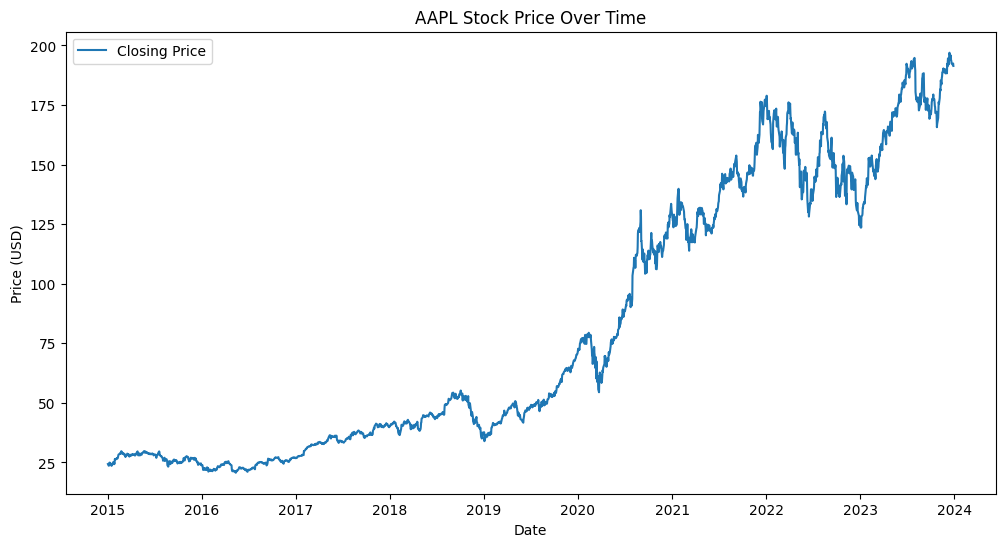

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='Closing Price')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Split into training and testing sets (80% training, 20% testing)
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]


In [6]:
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [7]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0233 - val_loss: 0.0013
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.7024e-04 - val_loss: 0.0015
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.3211e-04 - val_loss: 0.0012
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.7210e-04 - val_loss: 0.0014
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 2.9096e-04 - val_loss: 0.0022
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.4968e-04 - val_loss: 0.0015
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.1157e-04 - val_loss: 0.0010
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 2.6882e-04 - val_loss: 0.0011
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 4.2034e-04 - val_loss: 0.0052
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0011 - val_loss: 9.4072e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 2.8149e-04 - val_loss: 9.0574e-04
Epoch 12/20
56/56 ━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


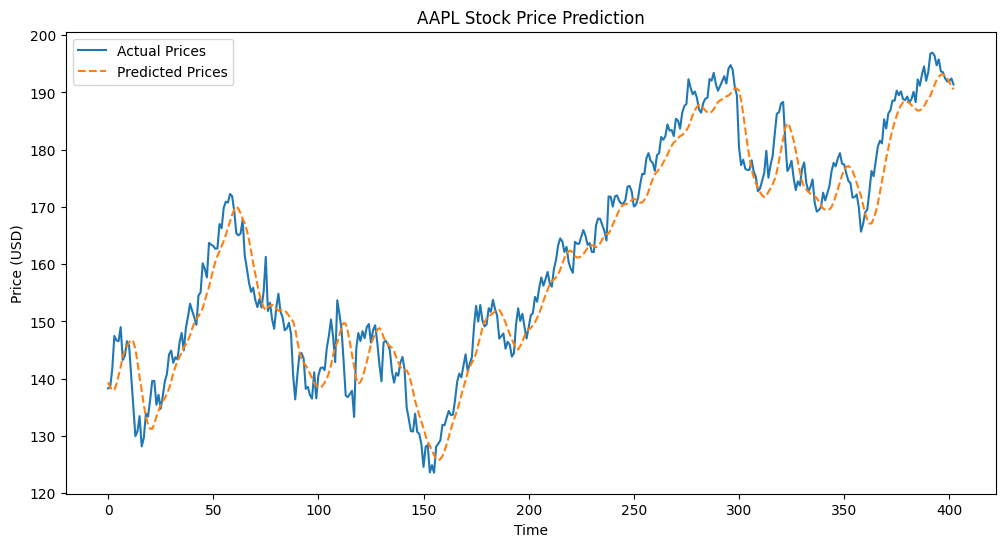

In [8]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original scale
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices")
plt.plot(predictions, label="Predicted Prices", linestyle="dashed")
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [9]:
mae = mean_absolute_error(actual_prices, predictions)
rmse = np.sqrt(mean_squared_error(actual_prices, predictions))

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 3.73
Root Mean Squared Error (RMSE): 4.59


In [10]:
model.save("stock_price_lstm_model.h5")
